# STAT 207 Project 03 - Salary Trends and Employment Patterns in Data Science Related Professions
Quinn Crockling and Gabe Price

### Contribution Report

If you open this document, you should edit and complete the contribution report.  Please complete this report if you work individually, in a group and your submission is the one to be graded, or in a group but someone else should be graded.

In this contribution report below you should list of the following:
1. The netID for the project submission to be graded.  (Some groups have each member create their own version of the document, but only one needs to be submitted for grading.  Other groups have only one member compose and submit the project.)
2. Names and netIDs of each team member.
3. Contributions to report of each team member.

*For example:*

*<u>Teammates:</u>*

*doe105 should be graded.  John Smith (smith92) & Jane Doe (doe105) worked together on all parts of this project*, 

OR

*doe105 should be graded*

<i>1. John Smith (smith92) completed parts 1 - 3</i>

<i>2. Jane Doe (doe105) completed parts 4 - 5</i>

<i>We both reviewed the full document before submission.</i>

tpric5 should be graded. 
- Quinn Crockling (qdc2) completed part 3 & 4
- Gabe Price (tpric5) completed parts 1-3

## 1. Introduction

Dataset Introduction:

In this project, we utilize a comprehensive dataset to examine two primary case studies related to data science professionals. The dataset includes global information on job titles, locations, experience levels, company sizes, and salaries, as well as employee residence details. For the first model, linear regression, we analyze salary trends across various expertise levels, aiming to predict future salaries and identify the key factors driving salary growth in data science roles. The second model, logistic regression, focuses on logistic regression to determine the likelihood of an employee residing in the United States, considering predictors such as expertise level, company location, and salary. The dataset, updated with 2024 data, provides a robust foundation for exploring these critical questions in the data science field.

Research Questions:
- How do expertise levels, company size, and other factors influence the salary trends for data science professionals over time, and how can we predict future salaries across different expertise levels in the field?
- What are the key factors influencing the likelihood of an employee's residence being in the United States for Data Science related jobs, and how accurately can these factors predict residence using logistic regression?

In [1]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_curve, auc, mean_squared_error, recall_score
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [2]:
df = pd.read_csv('/Users/gabeprice/Desktop/uiuc/Fall 2024/stat207/tpric5/project_03/v7_Latest_Data_Science_Salaries.csv')
df.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Mid,Intermediate,138000,United States Dollar,United States,138000,United States,Medium,2024
1,Data Engineer,Full-Time,Mid,Intermediate,86000,United States Dollar,United States,86000,United States,Medium,2024
2,Data Analyst,Full-Time,Entry,Junior,179000,United States Dollar,United States,179000,United States,Medium,2024
3,Data Analyst,Full-Time,Entry,Junior,112000,United States Dollar,United States,112000,United States,Medium,2024
4,Business Intelligence Developer,Full-Time,Mid,Intermediate,92000,United States Dollar,United States,92000,United States,Medium,2024


In [3]:
df.columns = df.columns.str.replace(" ", "_")

In [4]:
df["Job_Title"].unique()

array(['Data Engineer', 'Data Analyst', 'Business Intelligence Developer',
       'BI Developer', 'Business Intelligence Analyst', 'Data Developer',
       'AI Architect', 'Data Architect', 'Data Scientist',
       'Machine Learning Engineer', 'Data Science', 'Research Engineer',
       'Data Science Manager', 'Data Analytics Manager',
       'Research Analyst', 'AI Engineer', 'Research Scientist',
       'Data Science Engineer', 'Data Product Manager',
       'Analytics Engineer', 'Data Specialist', 'Data Modeler',
       'ETL Developer', 'Data Strategist', 'Prompt Engineer',
       'Data Science Lead', 'ML Engineer', 'Data Quality Manager',
       'Applied Scientist', 'Head of Data',
       'Business Intelligence Engineer', 'Data Science Consultant',
       'Machine Learning Scientist', 'Business Intelligence Manager',
       'Data Manager', 'Computer Vision Engineer', 'AI Product Manager',
       'Data Analytics Lead', 'Director of Data Science',
       'Data Product Owner', 'Machin

Response Variables:

For our linear regression model the response variable is Salary_in_USD which is a continuous variable in our dataset. While for the logistic regression model the response variable is USA_Residence which is a binary variable we created that corresponds to either living in the United States - 1, or not - 0.

Motivation:

Our motivation for this project is to learn, as prosperous data scientists oursleves, how much the salary in our job field will increase, relatively, in the next 5 years. In addition we would like to see what predictors are the best, or most statistically significant, with being an employee that lives in the United States of America. This would be helpful to learn if something like company size or expertise level played a large part of the available data science roles in the United States.

In [5]:
df["Expertise_Level"].unique()

array(['Intermediate', 'Junior', 'Expert', 'Director'], dtype=object)

## 2. Linear Regression Analytical Tasks

Research Question: How do expertise levels, company size, and other factors influence the salary trends for data science professionals over time, and how can we predict future salaries across different expertise levels in the field?

To begin our analysis, we first have to create a training and testing set, then encode all categorical variables to make them easier to use as predictors for our linear regression model. Next, we will use forward selection to eliminate any variables that will lower our models R^2 adjusted value. After completing this forward selection we will fit a full model and then check for multicollinearity with a correlation matrix along with statistical significance with the p-values of the predictors. Then, we will create a reduced model that includes only the statistically significant predictors and minimizes multicollinearity, ensuring the model is both parsimonious and interpretable while retaining predictive accuracy. Once the reduced model has been created we will examine the relationship between your selected x and y with a 95% confidence interval for the coefficient of our x variable. Last, we will fit another model utilizing an interaraction term along with each different category of our predictors to create a graphn showing the predicted salary increases of the next 5 years for each expertise level of a data science related professional that lives in the United States.

In [6]:
df_train, df_test = train_test_split(df, test_size=0.20, random_state=1101)
print(df_train.shape[0]/df.shape[0])
df_train.head()

0.799860529986053


,Job_Title,Employment_Type,Experience_Level,Expertise_Level,Salary,Salary_Currency,Company_Location,Salary_in_USD,Employee_Residence,Company_Size,Year
1167,Data Architect,Full-Time,Senior,Expert,185000,United States Dollar,United States,185000,United States,Medium,2023
1697,Machine Learning Engineer,Full-Time,Senior,Expert,222405,United States Dollar,United States,222405,United States,Medium,2023
2824,Data Manager,Full-Time,Senior,Expert,172750,United States Dollar,United States,172750,United States,Medium,2023
3889,Analytics Engineer,Full-Time,Senior,Expert,230000,United States Dollar,United States,230000,United States,Medium,2023
3767,Data Scientist,Full-Time,Mid,Intermediate,102500,United States Dollar,United States,102500,United States,Medium,2023


In [7]:
df_labeled = df_train.copy()

categorical_columns = ['Job_Title', 'Employment_Type', 'Experience_Level','Expertise_Level','Company_Location', 'Employee_Residence', 'Company_Size']

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df_labeled[col] = label_encoders[col].fit_transform(df_labeled[col])

In [8]:
df_labeled.head()

,Job_Title,Employment_Type,Experience_Level,Expertise_Level,Salary,Salary_Currency,Company_Location,Salary_in_USD,Employee_Residence,Company_Size,Year
1167,39,2,3,1,185000,United States Dollar,69,185000,78,1,2023
1697,95,2,3,1,222405,United States Dollar,69,222405,78,1,2023
2824,49,2,3,1,172750,United States Dollar,69,172750,78,1,2023
3889,8,2,3,1,230000,United States Dollar,69,230000,78,1,2023
3767,68,2,2,2,102500,United States Dollar,69,102500,78,1,2023


In [9]:
threshold_r2_adj = 0

test_model = smf.ols(formula='Salary_in_USD ~ Employment_Type', data=df_labeled).fit()
print(f"Adding 'Employment Type': Adjusted R² = {test_model.rsquared_adj} - {'Yes' if test_model.rsquared_adj > threshold_r2_adj else 'No'}")

if test_model.rsquared_adj > threshold_r2_adj:
    threshold_r2_adj = test_model.rsquared_adj

Adding 'Employment Type': Adjusted R² = -0.00017028606286140224 - No


In [10]:
test_model = smf.ols(formula='Salary_in_USD ~ Employment_Type + Experience_Level', data=df_labeled).fit()
print(f"Adding 'Experience Level': Adjusted R² = {test_model.rsquared_adj} - {'Yes' if test_model.rsquared_adj > threshold_r2_adj else 'No'}")

if test_model.rsquared_adj > threshold_r2_adj:
    threshold_r2_adj = test_model.rsquared_adj

Adding 'Experience Level': Adjusted R² = 0.09289435115209577 - Yes


In [11]:
test_model = smf.ols(formula='Salary_in_USD ~ Employment_Type + Experience_Level + Expertise_Level', data=df_labeled).fit()
print(f"Adding 'Expertise Level': Adjusted R² = {test_model.rsquared_adj} - {'Yes' if test_model.rsquared_adj > threshold_r2_adj else 'No'}")

if test_model.rsquared_adj > threshold_r2_adj:
    threshold_r2_adj = test_model.rsquared_adj

Adding 'Expertise Level': Adjusted R² = 0.16324455870295618 - Yes


In [12]:
test_model = smf.ols(formula='Salary_in_USD ~ Employment_Type + Experience_Level + Expertise_Level + Company_Location', data=df_labeled).fit()
print(f"Adding 'Company Location': Adjusted R² = {test_model.rsquared_adj} - {'Yes' if test_model.rsquared_adj > threshold_r2_adj else 'No'}")

if test_model.rsquared_adj > threshold_r2_adj:
    threshold_r2_adj = test_model.rsquared_adj

Adding 'Company Location': Adjusted R² = 0.1954804781657702 - Yes


In [13]:
test_model = smf.ols(formula='Salary_in_USD ~ Employment_Type + Experience_Level + Expertise_Level + Company_Location + Employee_Residence', data=df_labeled).fit()
print(f"Adding 'Exployee Residence': Adjusted R² = {test_model.rsquared_adj} - {'Yes' if test_model.rsquared_adj > threshold_r2_adj else 'No'}")

if test_model.rsquared_adj > threshold_r2_adj:
    threshold_r2_adj = test_model.rsquared_adj

Adding 'Exployee Residence': Adjusted R² = 0.1975173207908154 - Yes


In [14]:
test_model = smf.ols(formula='Salary_in_USD ~ Employment_Type + Experience_Level + Expertise_Level + Company_Location + Employee_Residence + Company_Size', data=df_labeled).fit()
print(f"Adding 'Company Size': Adjusted R² = {test_model.rsquared_adj} - {'Yes' if test_model.rsquared_adj > threshold_r2_adj else 'No'}")

if test_model.rsquared_adj > threshold_r2_adj:
    threshold_r2_adj = test_model.rsquared_adj

Adding 'Company Size': Adjusted R² = 0.19734493442011558 - No


In [15]:
test_model = smf.ols(formula='Salary_in_USD ~ Employment_Type + Experience_Level + Expertise_Level + Company_Location + Employee_Residence + Year', data=df_labeled).fit()
print(f"Adding 'Year': Adjusted R² = {test_model.rsquared_adj} - {'Yes' if test_model.rsquared_adj > threshold_r2_adj else 'No'}")

if test_model.rsquared_adj > threshold_r2_adj:
    threshold_r2_adj = test_model.rsquared_adj

Adding 'Year': Adjusted R² = 0.20427518099982545 - Yes


In [16]:
selected_predictors = ['Employment_Type', 'Experience_Level','Expertise_Level','Company_Location', 'Employee_Residence','Year'] 
predictor_data = df_labeled[selected_predictors]
predictor_data_numeric = predictor_data.apply(pd.to_numeric, errors='coerce')
correlation_matrix = predictor_data_numeric.corr()

print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,Employment_Type,Experience_Level,Expertise_Level,Company_Location,Employee_Residence,Year
Employment_Type,1.000000,0.008233,-0.008513,0.020972,0.022046,0.060459
Experience_Level,0.008233,1.000000,-0.735502,0.107033,0.113305,0.120409
Expertise_Level,-0.008513,-0.735502,1.000000,-0.134327,-0.139242,-0.108504
Company_Location,0.020972,0.107033,-0.134327,1.000000,0.944388,0.203492
Employee_Residence,0.022046,0.113305,-0.139242,0.944388,1.000000,0.211340
Year,0.060459,0.120409,-0.108504,0.203492,0.211340,1.000000


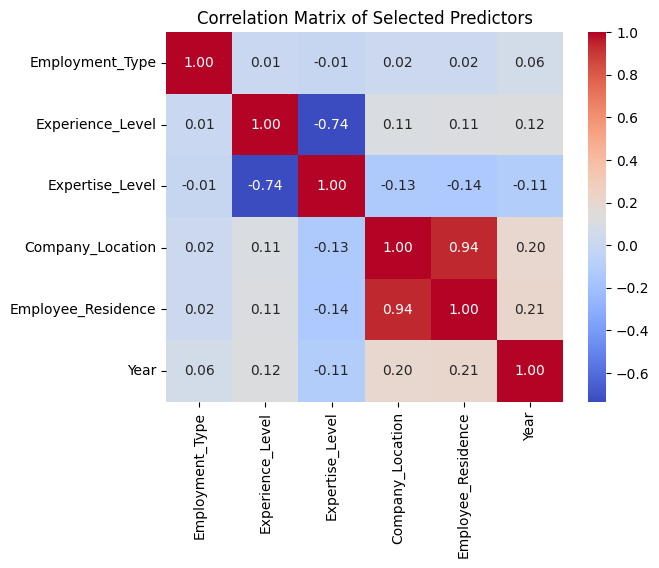

In [17]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Predictors")
plt.show()

In [18]:
full_model = smf.ols(formula='Salary_in_USD ~ Employment_Type + Experience_Level + Expertise_Level + Company_Location + Employee_Residence + Year + Company_Size', data=df_labeled).fit()
print(test_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Salary_in_USD   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     197.3
Date:                Sat, 28 Dec 2024   Prob (F-statistic):          2.76e-224
Time:                        15:04:36   Log-Likelihood:                -57201.
No. Observations:                4588   AIC:                         1.144e+05
Df Residuals:                    4581   BIC:                         1.145e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.881e+07      3

- removed company location, experience level and employment type because of non significance to the model and multicollinearity
- removed company size due to lowering the adjusted R^2 value
Final model predictor variables: Expertise_Level + Employee_Residence + Year

In [19]:
reduced_model = smf.ols(formula='Salary_in_USD ~ Expertise_Level + Employee_Residence + Year', data=df_labeled).fit()
print(reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Salary_in_USD   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     394.2
Date:                Sat, 28 Dec 2024   Prob (F-statistic):          8.82e-228
Time:                        15:04:36   Log-Likelihood:                -57202.
No. Observations:                4588   AIC:                         1.144e+05
Df Residuals:                    4584   BIC:                         1.144e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.884e+07   2.99

Relationship Examination:

The interpretation of our slope coefficient is - for every additional year, the predicted salary of a data science professional increases by approximately $9,387.34 USD, holding other variables Expertise Level and Employee Residence constant.

Slope Confidence Interval & Inference Hypothesis Test:

The confidence interval value can be pulled directly from the model summary. We are 95% confident that, in the underlying population, the increase in salary associated with each additional year lies between $6,487.98 and $12,300.71 USD, holding other variables constant.

- Ho: The slope for Year in the population is equal to 0
- Ha: The slope for Year in the population is not equal to 0

Since the p-value < 0.0001, which is significantly smaller than 0.05, we choose to reject the null hypothesis and conclude that the Year variable is significantly associated with Salary_in_USD in the population.

Graphical Summaries:

The graphical summaries suggest that some linear regression assumptions are not fully met; moreover, heteroscedasticity and non-normality of residuals are major concerns within our model. The fitted vs residuals graph shows non-linearity as there is a pattern within the graph while the Q-Q plot shows non-normality with strong deviance of the points from the line.

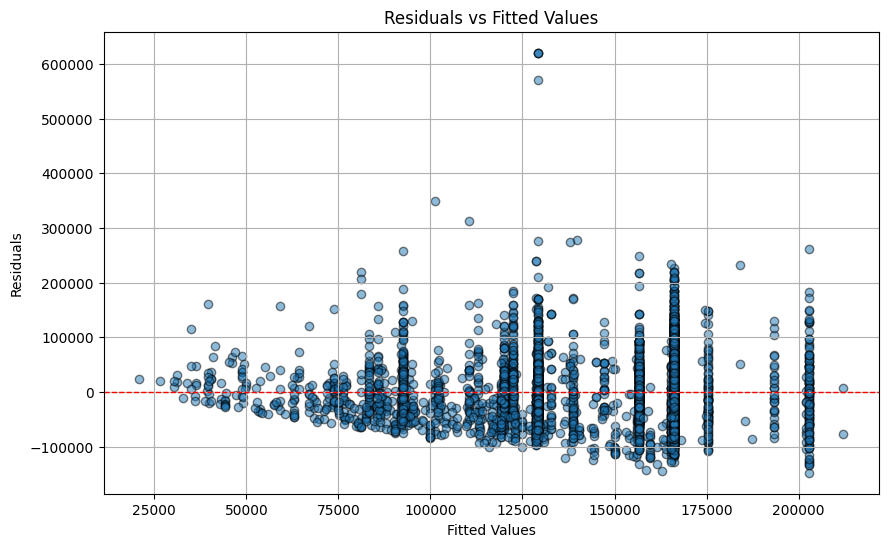

In [20]:
residuals = reduced_model.resid
fitted = reduced_model.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(fitted, residuals, alpha=0.5, edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

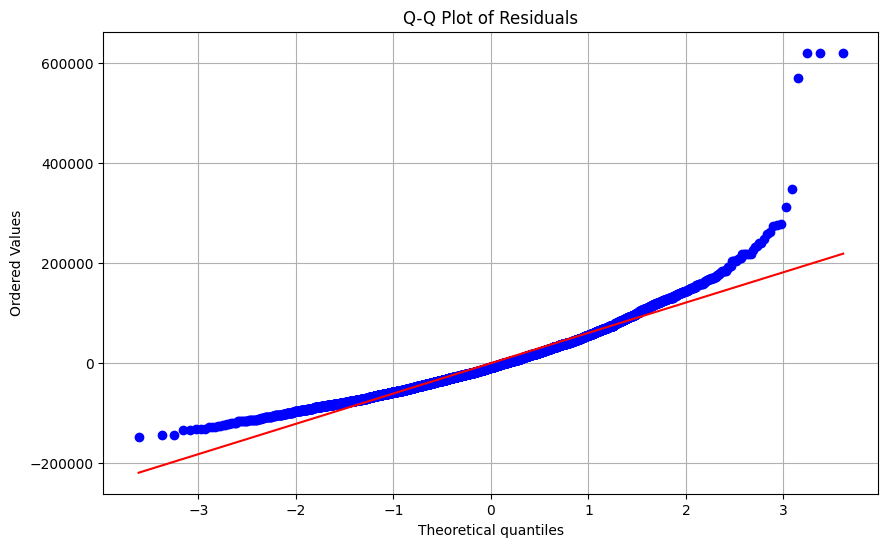

In [21]:
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

Model Performance:

The R^2-adjusted value is 0.205; moreover 20.5% of the variability in Salary_in_USD is explained by the predictors, Expertise_Level, Employee_Residence, and Year in the training data. This is a low to moderate percent of variability given that we are trying to predict salary; however, 79.5% of variability remaining unexplained is high regarldless of the response variable bringing us to the conclusion that our percent of variability is low.

An RMSE of 70,752.96 is relatively high for salary prediction, especially if the median or average salary is close to $100,000. Improving the model by including additional predictors or exploring non-linear models may help reduce the RMSE. However, given we are predicting something as unpredictable as salary changes for different levels of expertise within a technical field, it is acceptable.


In [22]:
y_test = df_test['Salary_in_USD'] 
X_test = df_test[['Expertise_Level', 'Employee_Residence', 'Year']]

X_test = pd.get_dummies(X_test, drop_first=True)

X_test = X_test.reindex(columns=reduced_model.model.exog_names, fill_value=0)

y_pred = reduced_model.predict(X_test)

residuals = y_test - y_pred
squared_residuals = residuals ** 2
mean_squared_error = np.mean(squared_residuals)
rmse_manual = np.sqrt(mean_squared_error)

print(f"RMSE: {round(rmse_manual,4)}")

RMSE: 70752.9624


In [23]:
cat_reduced_model = smf.ols(formula='Salary_in_USD ~ Expertise_Level + Year + Employee_Residence', data=df_train).fit()

print(cat_reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Salary_in_USD   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     22.24
Date:                Sat, 28 Dec 2024   Prob (F-statistic):          8.05e-274
Time:                        15:04:36   Log-Likelihood:                -56933.
No. Observations:                4588   AIC:                         1.140e+05
Df Residuals:                    4503   BIC:                         1.146e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

Formula for an Intermediate position of an Employee that lives in the United States:
- y-hat = B0 + B1 * Year + B2 * Expertise_Level(Intermediate) + B3 * Employee Residence(USA)
- y-hat = -8.997e+06 + 4504.7876 * Year + (-6.531e+04) + -6.531e+04 

In [24]:
future_years = pd.DataFrame({'Year': range(int(df_test['Year'].max()) + 1, int(df_test['Year'].max()) + 6)})

future_years['Employee_Residence'] = 'United States'
all_predictions = []
actual_data = {}

expertise_levels = df_test['Expertise_Level'].unique()

for level in expertise_levels:
    actual = df_test[df_test['Expertise_Level'] == level].groupby('Year', as_index=False)['Salary_in_USD'].mean()
    actual_data[level] = actual

    future_years['Expertise_Level'] = level
    future_predictions = cat_reduced_model.predict(future_years)

    predictions = pd.DataFrame({
        'Year': future_years['Year'],
        'Predicted Salary in USD': future_predictions,
        'Expertise_Level': level
    })
    all_predictions.append(predictions)

all_predictions = pd.concat(all_predictions)
all_predictions.head(10)


,Year,Predicted Salary in USD,Expertise_Level
0,2025,178402.948932,Expert
1,2026,182907.736498,Expert
2,2027,187412.524063,Expert
3,2028,191917.311628,Expert
4,2029,196422.099193,Expert
0,2025,145602.831183,Intermediate
1,2026,150107.618748,Intermediate
2,2027,154612.406313,Intermediate
3,2028,159117.193878,Intermediate
4,2029,163621.981444,Intermediate


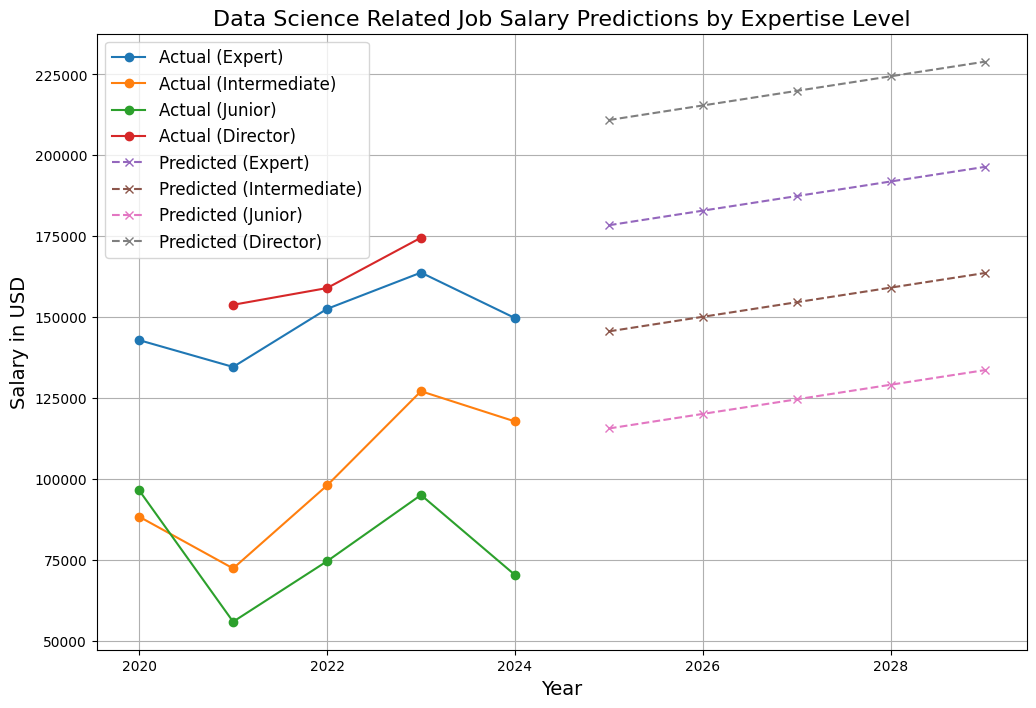

In [25]:
plt.figure(figsize=(12, 8))

for level, actual in actual_data.items():
    plt.plot(
        actual['Year'],
        actual['Salary_in_USD'],
        marker='o',
        label=f'Actual ({level})'
    )

for level in expertise_levels:
    pred = all_predictions[all_predictions['Expertise_Level'] == level]
    plt.plot(
        pred['Year'],
        pred['Predicted Salary in USD'],
        linestyle='--',
        marker='x',
        label=f'Predicted ({level})'
    )

plt.title('Data Science Related Job Salary Predictions by Expertise Level', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Salary in USD', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

## 3. Logistic Regression Analytical Tasks

Research Question: What are the key factors influencing the likelihood of an employee's residence being in the United States for Data Science related jobs, and how accurately can these factors predict residence using logistic regression?

In [26]:
print(df["Expertise_Level"].unique())
print(df.isna().sum())

['Intermediate' 'Junior' 'Expert' 'Director']
Job_Title             0
Employment_Type       0
Experience_Level      0
Expertise_Level       0
Salary                0
Salary_Currency       0
Company_Location      0
Salary_in_USD         0
Employee_Residence    0
Company_Size          0
Year                  0
dtype: int64


In [27]:
df_labeled = df.copy()

categorical_columns = ['Job_Title', 'Employment_Type', 'Experience_Level','Expertise_Level','Company_Location', 'Employee_Residence', 'Company_Size']

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df_labeled[col] = label_encoders[col].fit_transform(df_labeled[col])

In [28]:
df_labeled['USA_Residence'] = df['Employee_Residence'].apply(lambda x: 1 if x == "United States" else 0)
print(df_labeled['USA_Residence'].value_counts())


USA_Residence
1    4515
0    1221
Name: count, dtype: int64


In [29]:
df_train, df_test = train_test_split(df_labeled, test_size=0.20, random_state=1101)
print(df_train.shape[0]/df.shape[0])
df_train.head()

0.799860529986053


,Job_Title,Employment_Type,Experience_Level,Expertise_Level,Salary,Salary_Currency,Company_Location,Salary_in_USD,Employee_Residence,Company_Size,Year,USA_Residence
1167,43,2,3,1,185000,United States Dollar,73,185000,83,1,2023,1
1697,100,2,3,1,222405,United States Dollar,73,222405,83,1,2023,1
2824,53,2,3,1,172750,United States Dollar,73,172750,83,1,2023,1
3889,8,2,3,1,230000,United States Dollar,73,230000,83,1,2023,1
3767,73,2,2,2,102500,United States Dollar,73,102500,83,1,2023,1


In [30]:
df_labeled.head()

,Job_Title,Employment_Type,Experience_Level,Expertise_Level,Salary,Salary_Currency,Company_Location,Salary_in_USD,Employee_Residence,Company_Size,Year,USA_Residence
0,46,2,2,2,138000,United States Dollar,73,138000,83,1,2024,1
1,46,2,2,2,86000,United States Dollar,73,86000,83,1,2024,1
2,36,2,0,3,179000,United States Dollar,73,179000,83,1,2024,1
3,36,2,0,3,112000,United States Dollar,73,112000,83,1,2024,1
4,25,2,2,2,92000,United States Dollar,73,92000,83,1,2024,1


In [31]:
full_logmodel = smf.logit(formula='USA_Residence ~ Employment_Type + Experience_Level + Expertise_Level + Company_Location + Year + Salary_in_USD + Company_Size + Year + Job_Title', data=df_train).fit()
predictions = full_logmodel.predict(df_test)
print(full_logmodel.summary())


Optimization terminated successfully.
         Current function value: 0.215735
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:          USA_Residence   No. Observations:                 4588
Model:                          Logit   Df Residuals:                     4579
Method:                           MLE   Df Model:                            8
Date:                Sat, 28 Dec 2024   Pseudo R-squ.:                  0.5834
Time:                        15:04:37   Log-Likelihood:                -989.79
converged:                       True   LL-Null:                       -2375.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -809.2276    178.063     -4.545      0.000   -1158.224    -460.231
Employment

In [32]:
reduced_logmodel = smf.logit(formula='USA_Residence ~ Expertise_Level + Salary_in_USD + Company_Location', data=df_train).fit()
predictions = reduced_logmodel.predict(df_test)
print(reduced_logmodel.summary())

Optimization terminated successfully.
         Current function value: 0.218060
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:          USA_Residence   No. Observations:                 4588
Model:                          Logit   Df Residuals:                     4584
Method:                           MLE   Df Model:                            3
Date:                Sat, 28 Dec 2024   Pseudo R-squ.:                  0.5789
Time:                        15:04:37   Log-Likelihood:                -1000.5
converged:                       True   LL-Null:                       -2375.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -37.6664      4.228     -8.908      0.000     -45.954     -29.379
Expertise_

From the summary of this model, we can conclude that Salary in USD is a significant predictor, with higher salaries positively associated with USA residence, Company Location is a strong and significant predictor, indicating that certain company locations strongly influence USA residence; in addition, Expertise Level shows a negative association with USA residence, but the effect is not statistically significant, so we cannot reliably infer its impact from this model.

In [33]:
predictions_prob = reduced_logmodel.predict(df_test)
predictions_binary = (predictions_prob >= 0.5).astype(int)

true_labels = df_test['USA_Residence']
true_labels.head()

3870    1
3098    1
3935    1
3222    1
1633    1
Name: USA_Residence, dtype: int64

In [34]:
threshold = 0.5
y_pred_binary = (predictions >= threshold).astype(int)

conf_matrix = confusion_matrix(df_test['USA_Residence'], y_pred_binary)

true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]
true_positive = conf_matrix[1, 1]


accuracy = accuracy_score(df_test['USA_Residence'], y_pred_binary)
sensitivity = recall_score(df_test['USA_Residence'], y_pred_binary)  
specificity = true_negative / (true_negative + false_positive) 

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy Rate: {accuracy:.4f}")
print(f"Sensitivity (True Positive Rate): {sensitivity:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")
# [[TN  FP]
# [FN  TP]]


Confusion Matrix:
[[141 103]
 [  1 903]]
Accuracy Rate: 0.9094
Sensitivity (True Positive Rate): 0.9989
Specificity (True Negative Rate): 0.5779


In [35]:
print("\nClassification Report:")
print(classification_report(true_labels, predictions_binary))



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.58      0.73       244
           1       0.90      1.00      0.95       904

    accuracy                           0.91      1148
   macro avg       0.95      0.79      0.84      1148
weighted avg       0.92      0.91      0.90      1148



In [36]:
fpr, tpr, thresholds = roc_curve(true_labels, predictions_prob)
roc_auc = auc(fpr, tpr)

print(f"\nAUC: {roc_auc:.2f}")


AUC: 0.92


Model Strength:

Both the AUC of 0.92 and the pseudo-R² of 0.5789 strongly suggest that the logistic regression model is highly effective at explaining and predicting the likelihood of USA residence for data science professionals. The high AUC indicates excellent classification ability, while the pseudo-R² demonstrates that the model explains a substantial proportion of the variability in the response variable. Overall, the model is accurate and well-fitted, with limited room for improvement in terms of prediction or fit.

Error Evalutation:

The error we aim to minimize is False Negatives because incorrectly predicting that a worker is not from the United States (when they are) could lead to unnecessary hiring of overqualified and higher-salaried workers. From our linear regression model, we know that higher expertise levels are associated with higher salaries. Thus, mistakenly assuming the need for a more expensive, overqualified worker when a U.S.-based worker would suffice could result in inefficient resource allocation and increased costs.

Model Satisfaction:

We are satisfied with out model because, although there is a high amount of False Positives resulting in a moderate Specificity, there is a super strong accuracy and specificity (only 1 False Negative in the confusion matrix) that makes us satisfied with the predictions our logistic regression model.

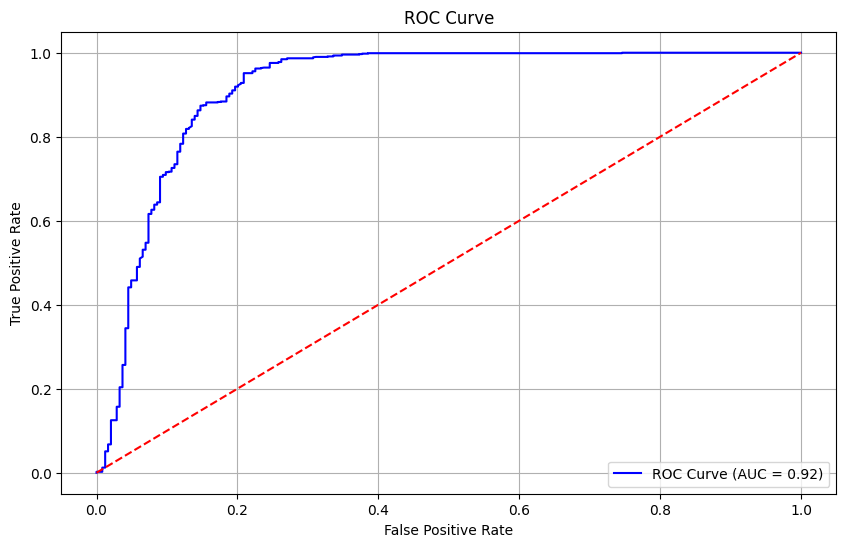

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


ROC Curve Analysis:

This ROC curve demonstrates the predictive performance of the logistic regression model, with an AUC value of 0.92, indicating a strong ability to distinguish between positive and negative classes. The curve shows a steep initial rise, signifying a high true positive rate at low false positive rates, which highlights the model's accuracy in correctly identifying true outcomes. The close proximity of the curve to the top-left corner of the plot further confirms that the model achieves a high level of sensitivity and specificity.

## 4. Conclusion

Summarization: 

In our analysis, we used linear regression to examine the relationship between salaries of data science professionals and various factors such as expertise level, employee residence, and year. The model revealed that salary increases are significantly associated with the expertise level residing in the United States, with higher salaries observed for U.S.-based employees and those at advanced expertise levels. However, the model had a low adjusted R² of 0.205, indicating limited explanatory power. Logistic regression was employed to predict the likelihood of a professional residing in the U.S. based on features such as salary, company location, and expertise level. The reduced logistic regression model, focusing on salary, company location, and expertise level, showed strong classification performance with an AUC of 0.92 and an accuracy rate of 91%. These findings highlight significant predictors but also underscore the limitations in fully explaining or predicting salary and residency.

Limitations: 

The primary limitations of our analysis stem from the dataset and model assumptions. The linear regression model struggled with high variability in salaries, as evidenced by its low R² value, and the residual diagnostics indicated potential issues with heteroscedasticity and non-linearity. Additionally, the logistic regression faced challenges with multicollinearity, particularly due to the overlap between company location and salary, which may inflate standard errors and obscure the impact of individual predictors. Contextual factors, such as cultural or economic differences across regions and evolving industry trends, were not included in the analysis, limiting the generalizability of our findings. These limitations highlight the need for caution when using these models to inform decisions about hiring strategies or salary predictions, as they may oversimplify complex realities.

Future Work:

Future research could explore incorporating non-linear models or feature engineering to better capture the complexity of salary determinants and residency predictors. Expanding the dataset to include additional variables, such as company size, job satisfaction, or benefits, could improve model performance and provide a more holistic understanding of the factors influencing salaries and employment locations. Further, temporal analyses using time-series methods could better capture salary trends and fluctuations over time. Finally, qualitative research, such as surveys or interviews, could complement these models by providing richer insights into the motivations and challenges faced by professionals in different regions and expertise levels.